# Michael Morrissey Case Study for Trivago
## September 24th, 2021

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Make the graphs a bit prettier, and bigger
plt.rcParams['figure.figsize'] = (15, 5)
import trivago_functions as tf
# Render our plots inline
%matplotlib inline 

# Dataset Overview

#### Importing Dataset

In [2]:
data = tf.import_dataset('case_study_marketing_20210201.csv')

#### Dataset Preview

In [3]:
data.head()

,ymd,market_code,account_id,pub_campaign_id,pub_adgroup_id,pub_keyword_id,keyword_name,pub_device,match_type,theme_name_english,replacement_type_name,impressions,clickins,cost,clickout,bookings,clickout_rev,booking_amount,users_engagement
0,20200905,DE,321,11312819993,114584083847,4729772737,neos marmaras hotels,phone,0,Hotel,City,1,0,0,0,0.0,0,0.0,490
1,20200905,DE,515,180791594,3133140280,76004101942085,altstadt florenz,desktop,0,HotelsHistoricCity,City,1,0,0,0,0.0,0,0.0,455
2,20200905,UK,505,180388254,1211662269993764,75729226461556,+apartment +wigan,desktop,2,Apartment,City,4,0,0,0,0.0,0,0.0,207
3,20200905,AU,391,11144550479,112858143241,93007224,accommodation jervis bay,tablet,1,Accommodation,City,1,0,0,0,0.0,0,0.0,253
4,20200905,BR,318,619614653,10709471032,4576251921,hoteis em Dubai,phone,0,Hotel,City,13,1,6,0,0.0,0,0.0,273


#### Number of Bookings per Ad

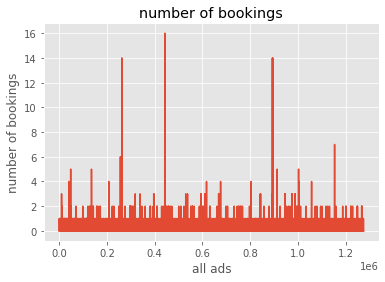

In [4]:
tf.show_number_of_bookings_bar(data)

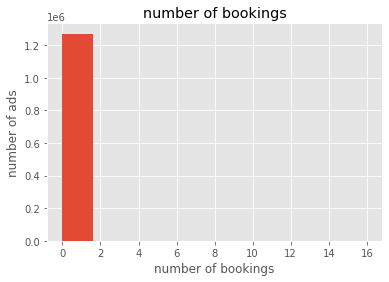

In [5]:
tf.show_number_of_bookings_histogram(data)

#### Number of Ads that had at least one booking

number of ads with at least one booking:  2138


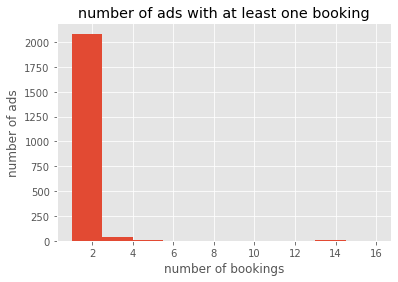

In [6]:
tf.show_number_of_ads_with_at_least_one_booking_histogram(data)

#### Number of Ads that had at least two bookings

In [7]:
tf.show_number_of_ads_with_at_least_two_bookings(data)

177  ads with at least two bookings


#### Number of Ads that had at least one booking sorted by Country

In [8]:
tf.show_ads_with_at_least_one_booking_by_country(data)

AU    904
BR    747
CA    180
UK    166
DE    141
Name: market_code, dtype: int64


#### Number of Ads that had at least one booking sorted by Country as percentage of total greater than one booking

AU    0.422825
BR    0.349392
CA    0.084191
UK    0.077643
DE    0.065949
Name: market_code, dtype: float64


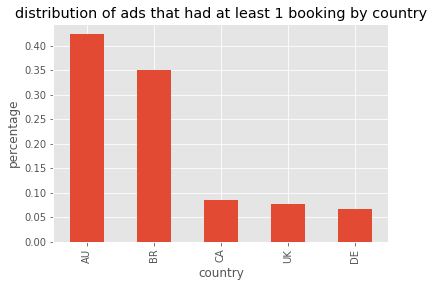

In [9]:
tf.show_distribution_ads_by_country(data)

#### Number of ads that had at least one booking sorted by type of device

In [10]:
tf.show_ads_by_device(data)

desktop    1150
phone       916
tablet       72
Name: pub_device, dtype: int64


#### Number of ads that had at least one booking sorted by number of matching keywords

In [11]:
tf.show_ads_by_matching_keywords(data)

2    1198
0     719
1     221
Name: match_type, dtype: int64


#### Average time Users engage with Trivago website

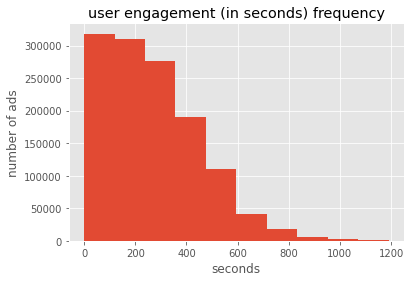

In [12]:
tf.show_user_engagement_histogram(data)

#### Trivago Revenue per Ad

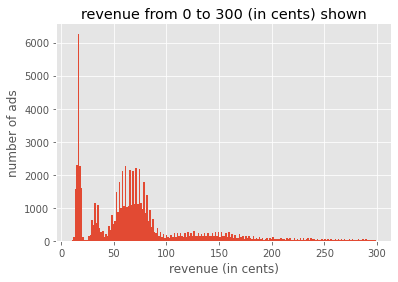

In [13]:
tf.show_revenue_per_ad_histogram_low_range(data)

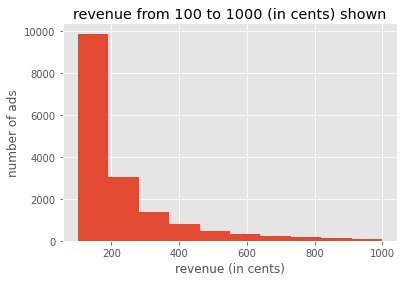

In [14]:
tf.show_revenue_per_ad_histogram_high_range(data)

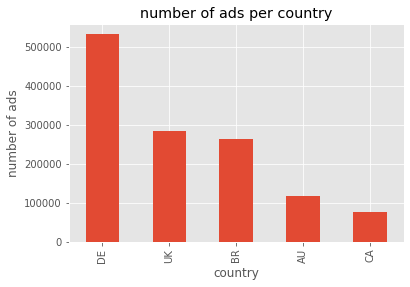

In [15]:
tf.show_number_of_ads_per_country_histogram(data)

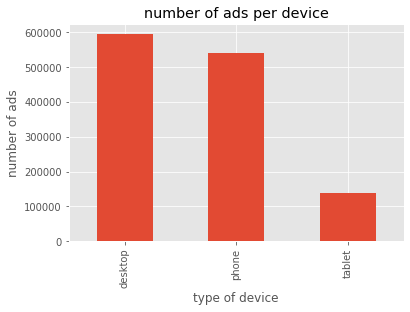

In [16]:
tf.show_number_of_ads_per_device_histogram(data)

In [17]:
tf.show_theme_name_english(data)

ItemHotel                 205552
Hotel                     181983
CityOnly                   93916
Accommodation              54775
Holidayflat                47469
                           ...  
RegionHotelsLastMinute         6
HTHotelsGoodValue              3
HTHotelsPeriodDec              1
HTHotelsBudget                 1
CountryHotelsOffer             1
Name: theme_name_english, Length: 408, dtype: int64


City           768430
Item           205552
CityOnly        93916
Region          91949
Poi             46969
Country         30862
RegionOnly      12047
HT              10688
PoiOnly          7663
CountryOnly      7109
Name: replacement_type_name, dtype: int64


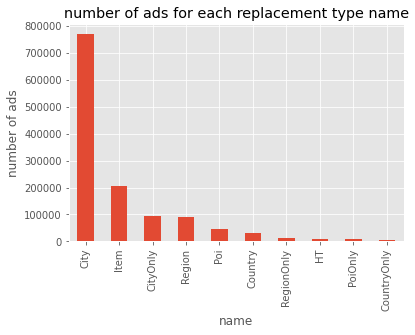

In [18]:
tf.show_replacement_type_name(data)

### Counting number of bookings by day of the week

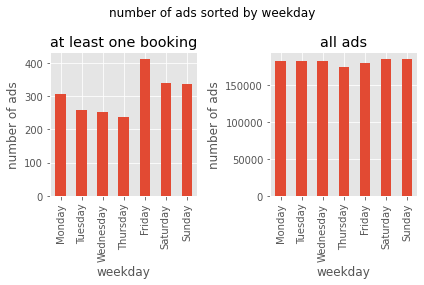

In [19]:
data_with_weekdays = tf.sort_ads_by_day_of_the_week(data)

#### Friday, Saturday, and Sunday tend to have more ads with at least one booking

## Hypothesis testing to see if Friday has on average more bookings than Thursday

### Null Hypothesis: 
$ h_0: \mu_{fridays} \leq \mu_{thursdays}$
vs
$ h_1: \mu_{fridays} > \mu_{thursdays}$

### Test:
reject null hypothesis if 
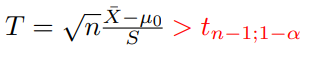

$ t_{179932;0.975} = 1.644862 $

In [20]:
tf.hypothesis_testing(data_with_weekdays)

test value =  75.72731822928488


#### test value is greater than t-score, so null hypothesis is rejected: ads placed on friday have on average more bookings than ads placed on thursday

# Best Performing Market
#### performance can be measured by revenue per click
#### revenue per click is "how much revenue is earned every time someone clicks  on an ad"
#### source: https://www.monetizemore.com/blog/what-is-the-best-metric-to-measure-ad-performance/#:~:text=There%20are%20four%20main%20ways,CTR%2C%20RPM%2C%20and%20RPC.&text=CPM%20refers%20to%20the%20cost,advertising%20cost%20per%20thousand%20views.&text=CTR%20refers%20to%20Click%2Dthrough,is%20for%20a%20given%20website.

#### average revenue per click per ad by country and global

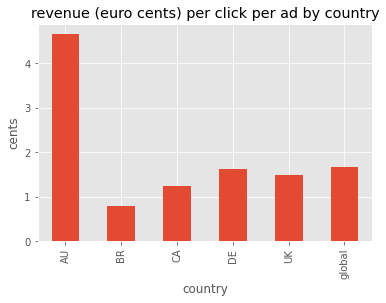

In [21]:
tf.show_rpc_per_ad_by_country(data)

#### Australia seems to be the best performing market

# What should be the average price to pay for conversion if we want to achieve 125% ROAS globally?

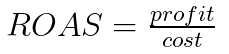

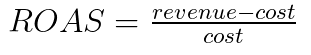


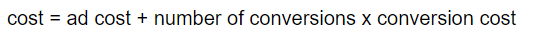

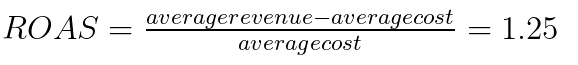

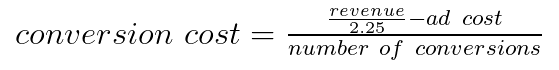

In [22]:
tf.calculate_conversion_cost(data)

conversion_cost =  -38.84941763131716


In [23]:
tf.calculate_cost_and_clickout(data)

average clickout revenue:  6.279304571493548
average cost:  8.939666009245718


#### average cost is higher than average clickout revenue which means money is lost with ads

# Training a model that predicts optimal keyword bid

In [25]:
import catboost as cb

# parameters (along with keywords) that will be used to predict number of clickins
features = ['market_code','pub_device','match_type','replacement_type_name','impressions'] 
target = 'clickins' # data that will be predicted
vocabulary = tf.separate_keywords(data) # takes keywords from database and converts them to list of strings
model = tf.create_word2vec_model(vocabulary)
X_features, y = tf.create_features_vector(data, features, target, vocabulary, model)
model = cb.CatBoostRegressor(loss_function='RMSE')
model.fit(X_features, y) # model is trained afterwards, can be used to predict clickin values next

Learning rate set to 0.110277
0:	learn: 12.5960139	total: 223ms	remaining: 3m 43s
1:	learn: 12.5948297	total: 277ms	remaining: 2m 18s
2:	learn: 12.5934537	total: 330ms	remaining: 1m 49s
3:	learn: 12.5922372	total: 371ms	remaining: 1m 32s
4:	learn: 12.5915096	total: 419ms	remaining: 1m 23s
5:	learn: 12.5903621	total: 476ms	remaining: 1m 18s
6:	learn: 12.5890680	total: 528ms	remaining: 1m 14s
7:	learn: 12.5878978	total: 582ms	remaining: 1m 12s
8:	learn: 12.5844528	total: 633ms	remaining: 1m 9s
9:	learn: 12.5834217	total: 694ms	remaining: 1m 8s
10:	learn: 12.5824674	total: 749ms	remaining: 1m 7s
11:	learn: 12.5813797	total: 793ms	remaining: 1m 5s
12:	learn: 12.5811734	total: 843ms	remaining: 1m 3s
13:	learn: 12.5803203	total: 891ms	remaining: 1m 2s
14:	learn: 12.5745829	total: 943ms	remaining: 1m 1s
15:	learn: 12.5707305	total: 1s	remaining: 1m 1s
16:	learn: 12.5698952	total: 1.05s	remaining: 1m
17:	learn: 12.5683137	total: 1.1s	remaining: 59.8s
18:	learn: 12.5672254	total: 1.15s	remainin

160:	learn: 12.3932394	total: 9.9s	remaining: 51.6s
161:	learn: 12.3930753	total: 9.98s	remaining: 51.6s
162:	learn: 12.3926749	total: 10s	remaining: 51.6s
163:	learn: 12.3925904	total: 10.1s	remaining: 51.5s
164:	learn: 12.3921783	total: 10.2s	remaining: 51.4s
165:	learn: 12.3885151	total: 10.2s	remaining: 51.5s
166:	learn: 12.3882349	total: 10.4s	remaining: 51.7s
167:	learn: 12.3881548	total: 10.4s	remaining: 51.5s
168:	learn: 12.3865482	total: 10.5s	remaining: 51.4s
169:	learn: 12.3861947	total: 10.5s	remaining: 51.3s
170:	learn: 12.3856850	total: 10.6s	remaining: 51.4s
171:	learn: 12.3855141	total: 10.7s	remaining: 51.4s
172:	learn: 12.3854106	total: 10.7s	remaining: 51.2s
173:	learn: 12.3852651	total: 10.8s	remaining: 51.2s
174:	learn: 12.3852047	total: 10.8s	remaining: 51s
175:	learn: 12.3832151	total: 10.9s	remaining: 50.9s
176:	learn: 12.3824090	total: 10.9s	remaining: 50.8s
177:	learn: 12.3820725	total: 11s	remaining: 50.7s
178:	learn: 12.3803052	total: 11.1s	remaining: 50.7s


316:	learn: 12.2346008	total: 18.8s	remaining: 40.5s
317:	learn: 12.2337184	total: 18.9s	remaining: 40.4s
318:	learn: 12.2331461	total: 18.9s	remaining: 40.4s
319:	learn: 12.2309990	total: 19s	remaining: 40.3s
320:	learn: 12.2307017	total: 19s	remaining: 40.2s
321:	learn: 12.2305425	total: 19.1s	remaining: 40.2s
322:	learn: 12.2299427	total: 19.1s	remaining: 40.1s
323:	learn: 12.2290407	total: 19.2s	remaining: 40.1s
324:	learn: 12.2286676	total: 19.3s	remaining: 40s
325:	learn: 12.2269259	total: 19.3s	remaining: 39.9s
326:	learn: 12.2266161	total: 19.4s	remaining: 39.9s
327:	learn: 12.2258434	total: 19.4s	remaining: 39.8s
328:	learn: 12.2255785	total: 19.5s	remaining: 39.7s
329:	learn: 12.2252304	total: 19.5s	remaining: 39.6s
330:	learn: 12.2237916	total: 19.6s	remaining: 39.5s
331:	learn: 12.2235530	total: 19.6s	remaining: 39.5s
332:	learn: 12.2227346	total: 19.7s	remaining: 39.4s
333:	learn: 12.2224223	total: 19.7s	remaining: 39.3s
334:	learn: 12.2220258	total: 19.8s	remaining: 39.3s

472:	learn: 12.0968319	total: 27.1s	remaining: 30.2s
473:	learn: 12.0964196	total: 27.1s	remaining: 30.1s
474:	learn: 12.0957172	total: 27.2s	remaining: 30s
475:	learn: 12.0956120	total: 27.2s	remaining: 30s
476:	learn: 12.0933415	total: 27.3s	remaining: 29.9s
477:	learn: 12.0927926	total: 27.3s	remaining: 29.9s
478:	learn: 12.0926263	total: 27.4s	remaining: 29.8s
479:	learn: 12.0921203	total: 27.4s	remaining: 29.7s
480:	learn: 12.0916970	total: 27.5s	remaining: 29.7s
481:	learn: 12.0902997	total: 27.6s	remaining: 29.6s
482:	learn: 12.0901646	total: 27.6s	remaining: 29.6s
483:	learn: 12.0897859	total: 27.7s	remaining: 29.5s
484:	learn: 12.0889786	total: 27.7s	remaining: 29.4s
485:	learn: 12.0886207	total: 27.8s	remaining: 29.4s
486:	learn: 12.0881593	total: 27.8s	remaining: 29.3s
487:	learn: 12.0861453	total: 27.9s	remaining: 29.3s
488:	learn: 12.0859754	total: 27.9s	remaining: 29.2s
489:	learn: 12.0841076	total: 28s	remaining: 29.2s
490:	learn: 12.0810316	total: 28.1s	remaining: 29.1s

631:	learn: 11.9878173	total: 35.6s	remaining: 20.7s
632:	learn: 11.9877038	total: 35.6s	remaining: 20.6s
633:	learn: 11.9872914	total: 35.6s	remaining: 20.6s
634:	learn: 11.9867101	total: 35.7s	remaining: 20.5s
635:	learn: 11.9842742	total: 35.8s	remaining: 20.5s
636:	learn: 11.9839415	total: 35.8s	remaining: 20.4s
637:	learn: 11.9835281	total: 35.8s	remaining: 20.3s
638:	learn: 11.9834285	total: 35.9s	remaining: 20.3s
639:	learn: 11.9830378	total: 36s	remaining: 20.2s
640:	learn: 11.9826940	total: 36s	remaining: 20.2s
641:	learn: 11.9822369	total: 36.1s	remaining: 20.1s
642:	learn: 11.9817736	total: 36.1s	remaining: 20.1s
643:	learn: 11.9812982	total: 36.2s	remaining: 20s
644:	learn: 11.9809011	total: 36.3s	remaining: 20s
645:	learn: 11.9806706	total: 36.3s	remaining: 19.9s
646:	learn: 11.9804397	total: 36.4s	remaining: 19.8s
647:	learn: 11.9802948	total: 36.4s	remaining: 19.8s
648:	learn: 11.9800014	total: 36.5s	remaining: 19.7s
649:	learn: 11.9797470	total: 36.6s	remaining: 19.7s
6

790:	learn: 11.9083347	total: 44.9s	remaining: 11.9s
791:	learn: 11.9080604	total: 45s	remaining: 11.8s
792:	learn: 11.9075635	total: 45.1s	remaining: 11.8s
793:	learn: 11.9074352	total: 45.2s	remaining: 11.7s
794:	learn: 11.9072368	total: 45.2s	remaining: 11.7s
795:	learn: 11.9071522	total: 45.3s	remaining: 11.6s
796:	learn: 11.9069803	total: 45.3s	remaining: 11.5s
797:	learn: 11.9053822	total: 45.4s	remaining: 11.5s
798:	learn: 11.9051952	total: 45.5s	remaining: 11.4s
799:	learn: 11.9045740	total: 45.5s	remaining: 11.4s
800:	learn: 11.9043316	total: 45.6s	remaining: 11.3s
801:	learn: 11.9039374	total: 45.6s	remaining: 11.3s
802:	learn: 11.9036915	total: 45.7s	remaining: 11.2s
803:	learn: 11.9035899	total: 45.7s	remaining: 11.1s
804:	learn: 11.9019712	total: 45.8s	remaining: 11.1s
805:	learn: 11.9017278	total: 45.8s	remaining: 11s
806:	learn: 11.9016305	total: 45.9s	remaining: 11s
807:	learn: 11.9012967	total: 45.9s	remaining: 10.9s
808:	learn: 11.8993761	total: 46s	remaining: 10.9s
8

946:	learn: 11.8285613	total: 53.8s	remaining: 3.01s
947:	learn: 11.8284190	total: 53.9s	remaining: 2.96s
948:	learn: 11.8283376	total: 54s	remaining: 2.9s
949:	learn: 11.8281272	total: 54s	remaining: 2.84s
950:	learn: 11.8279634	total: 54.1s	remaining: 2.79s
951:	learn: 11.8274143	total: 54.1s	remaining: 2.73s
952:	learn: 11.8272000	total: 54.2s	remaining: 2.67s
953:	learn: 11.8269720	total: 54.2s	remaining: 2.62s
954:	learn: 11.8262759	total: 54.3s	remaining: 2.56s
955:	learn: 11.8257557	total: 54.4s	remaining: 2.5s
956:	learn: 11.8257196	total: 54.4s	remaining: 2.44s
957:	learn: 11.8251464	total: 54.5s	remaining: 2.39s
958:	learn: 11.8241388	total: 54.5s	remaining: 2.33s
959:	learn: 11.8239980	total: 54.6s	remaining: 2.27s
960:	learn: 11.8239362	total: 54.6s	remaining: 2.22s
961:	learn: 11.8237639	total: 54.7s	remaining: 2.16s
962:	learn: 11.8237012	total: 54.7s	remaining: 2.1s
963:	learn: 11.8233728	total: 54.8s	remaining: 2.05s
964:	learn: 11.8227917	total: 54.9s	remaining: 1.99s


#### using a regression model to predict the number of clickins an ad may get based on its keywords, market code, device, match type, replacement type name, and impressions can allow us to decide whether or not to bid on an ad before publishing it.